# CubicGalileonEmu

> GP emulator for boost factor in cubic Galileon gravity model

Modified Gravity emulator for boost in the dark matter power spectra

## Install

(not installable yet)
```sh
pip install CubicGalileonEmu
```

## Basic rundown

### A few imports 

In [ ]:
from CubicGalileonEmu.load import *
from CubicGalileonEmu.viz import *
from CubicGalileonEmu.pca import *
from CubicGalileonEmu.gp import *
from CubicGalileonEmu.emu import *
from CubicGalileonEmu.mcmc import *

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

### Loading files

In [ ]:
Bk_all, k_all, z_all = load_boost_training()
p_all = load_params()

exclude = 35
Bk_all = np.delete(Bk_all, exclude, axis=0)
p_all = np.delete(p_all, exclude, axis=0)

### A few plotting routines

#### Experimental design

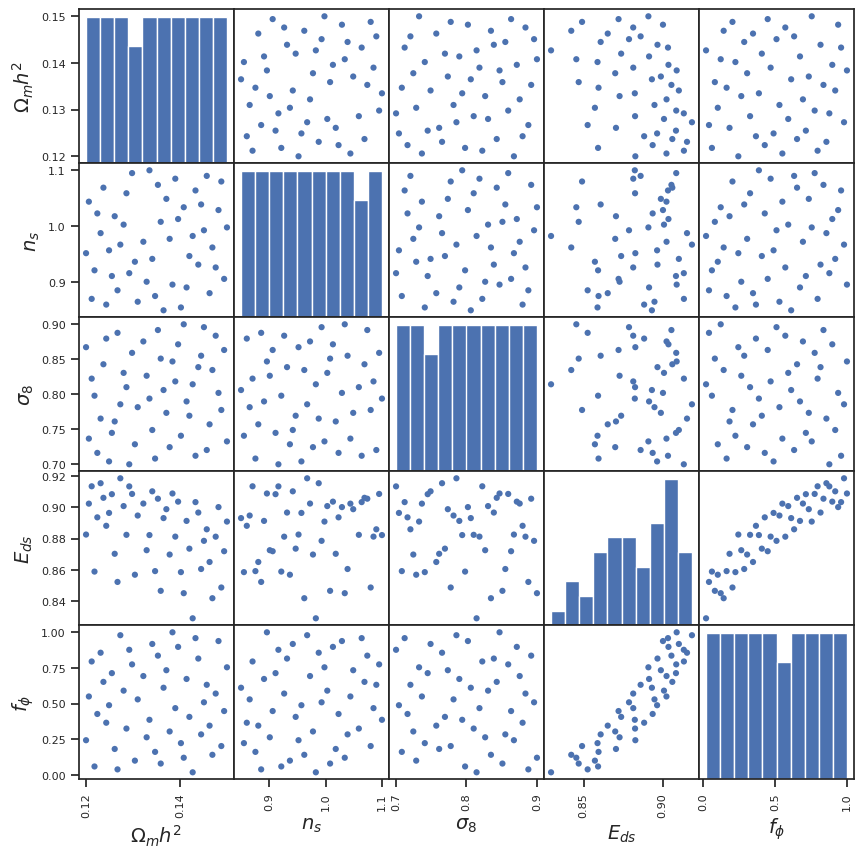

In [ ]:
df_train_a = pd.DataFrame(p_all, columns=PARAM_NAME)
colors = ['b']*p_all.shape[0]
# colors = ['b']*num_sims + ['r']*num_sims_test
plot_scatter_matrix(df_train_a, colors);

#### Boost metrics colored by cosmology parameters

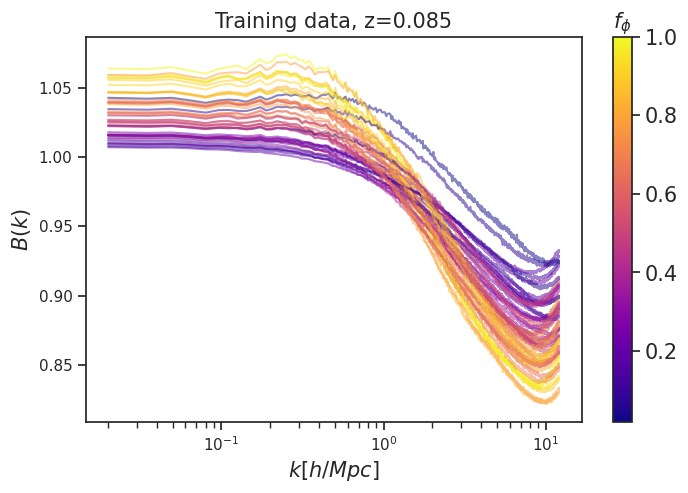

In [ ]:
color_by_index = 4
z_index = 0

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$B(k)$', 
                            PARAM_NAME[color_by_index]);

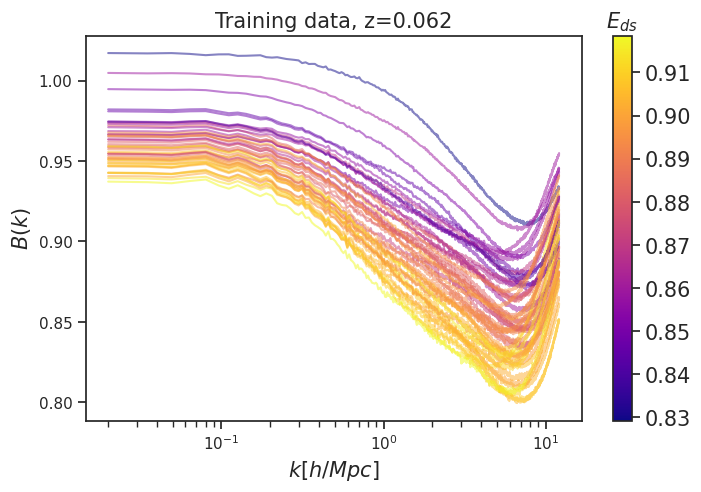

In [ ]:
color_by_index = 3
z_index = 21

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$B(k)$', 
                            PARAM_NAME[color_by_index]);

### Training involves: PCA, GP fitting.  

In [ ]:
## Data prep
z_index = 1
y_vals = Bk_all[:, z_index, :]
# y_ind = np.arange(0, y_vals.shape[1])
y_ind = k_all

# Train-test split
test_indices = [0, 14, 35]
input_params= p_all[test_indices]
target_vals = Bk_all[:, z_index, :][test_indices]

train_indices = [i for i in  np.arange(49) if i not in test_indices] 
p_all_train = p_all[train_indices]
y_vals_train = Bk_all[:, z_index, :][train_indices]

In [ ]:
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
print(sepia_data)
model_filename = '../CubicGalileonEmu/model/multivariate_model_z_index' + str(z_index) 

sepia_model = do_pca(sepia_data, exp_variance=0.95)
sepia_model = do_gp_train(sepia_model, model_filename)

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    46 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.69939481 0.25916416]
 [0.73580093 0.50984047]
 [0.10641831 0.05393297]
 [0.20991299 0.18908626]
 [0.94748741 0.10984598]
 [0.05176962 0.2190375 ]]
lamUz
[[0.62160791 0.73180062]]
lamWs
[[4681.97010197 4956.69449683]]
lamWOs
[[4.55542531]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 152.43it/s]

Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index1.pkl


### Load existing model

In [ ]:
sepia_model = gp_load(sepia_model, model_filename)

No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

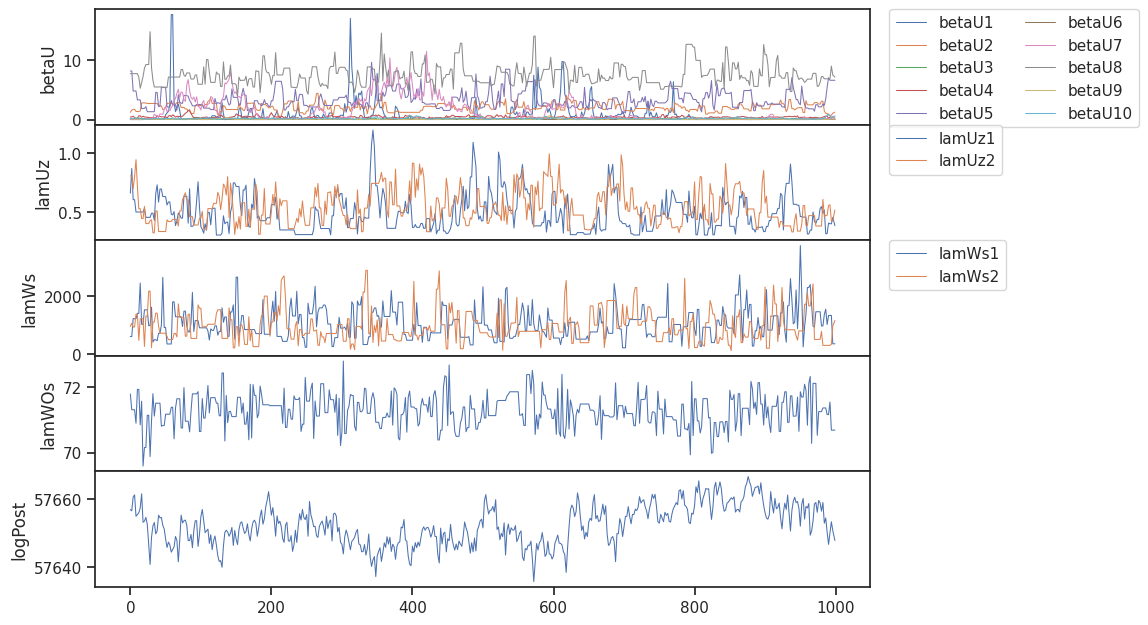

In [ ]:
plot_train_diagnostics(sepia_model)

### Single-redshift emulation for new cosmological parameters

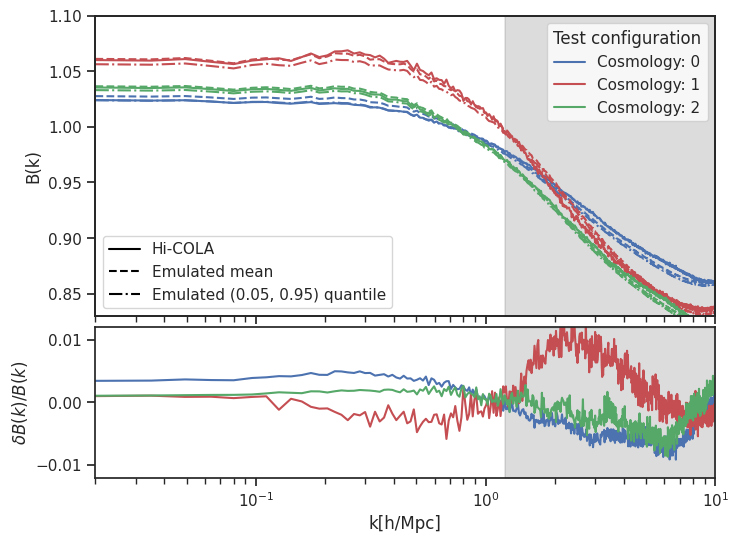

In [ ]:
pred_mean, pred_quant = emulate(sepia_model, input_params)
validation_plot(k_all, target_vals, pred_mean, pred_quant);

### Sensitivity analysis from the emulator 

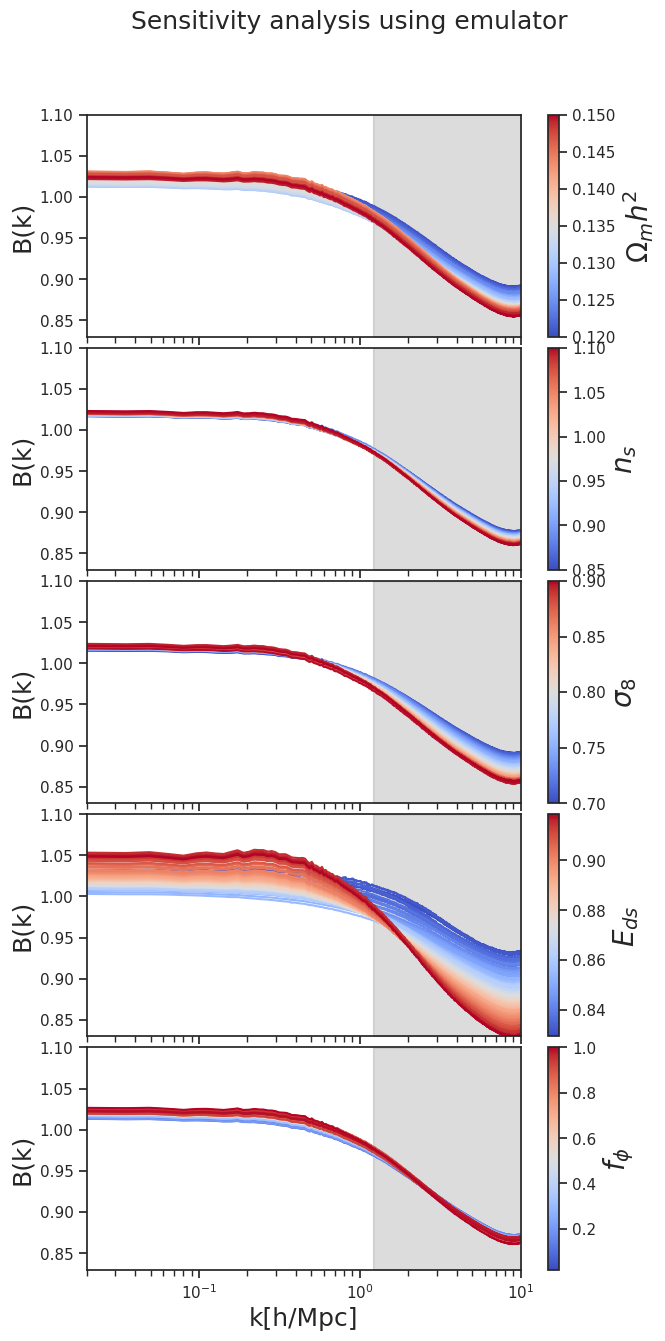

In [ ]:
f = sensitivity_plot(k_all, p_all, sepia_model, emulate, PARAM_NAME)

### Multi-redshift emulation

#### Train all the models

In [ ]:
do_gp_train_multiple(model_dir='../CubicGalileonEmu/model/', 
                     p_train_all = p_all[train_indices],
                     y_vals_all = Bk_all[train_indices],
                     y_ind_all = k_all,
                     z_index_range=np.arange(50, 51))

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.38it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.8181955  0.785562  ]
 [0.50810196 0.30986204]
 [0.05131889 0.09772101]
 [0.10465496 0.4583368 ]
 [0.80275269 1.01153757]
 [0.07433058 0.15343897]]
lamUz
[[0.80980682 0.68060687]]
lamWs
[[4792.19258679  951.73819855]]
lamWOs
[[0.10817436]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 152.58it/s]

Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index50.pkl
Training complete for snapshot 50
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [ ]:
sepia_model_list = load_model_multiple(model_dir='../CubicGalileonEmu/model/', 
                                       p_train_all=p_all,
                                       y_vals_all=Bk_all,
                                       y_ind_all=y_ind,
                                       z_index_range=range(51), 
                                       sepia_model_i=sepia_model)

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (nu

In [ ]:
input_params0 = input_params[0]
z_inputs = 0.1234
input_params_and_redshift = np.append(input_params0, z_inputs)
print(input_params_and_redshift[np.newaxis, :])

[[0.139      1.085      0.8184     0.88136007 0.4694     0.1234    ]]


In [ ]:
emulated_with_redshift, emulated_with_redshift_err = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)

Text(0.5, 1.0, 'Comparison of redshift-space interpolation')

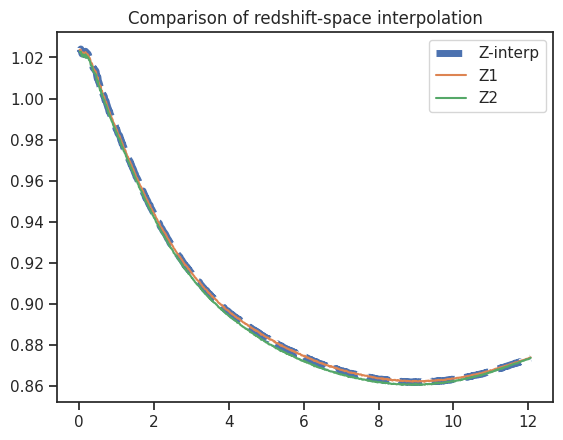

In [ ]:
plt.plot(k_all, emulated_with_redshift[:, 0], label='Z-interp', lw=5, ls='--')
plt.plot(k_all, emulate(sepia_model_list[2], input_params_and_redshift[:-1])[0], label='Z1')
plt.plot(k_all, emulate(sepia_model_list[3], input_params_and_redshift[:-1])[0], label='Z2')
plt.legend()
plt.title('Comparison of redshift-space interpolation')
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))

### Parameter inference via MCMC using the emulator

In [ ]:
ndim = 5
nwalkers = 100  # 500
nrun_burn = 50  # 300
nrun = 700  # 700

#### Creating mock observational data

In [ ]:
target_indx = 0 #0 ,14, 35
z_index = 1
L = 32
fake_obs_data_index_every = 10

redshift = 0.01
x = k_all[::fake_obs_data_index_every]
y = Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]
y = y + 1e-3*np.random.normal(0.0, 1.0, size=y.shape)
yerr = np.sqrt( Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]*(L**3))/(L**3)

x_grid = k_all
params_calib = p_all[target_indx][:, np.newaxis].T

<matplotlib.legend.Legend>

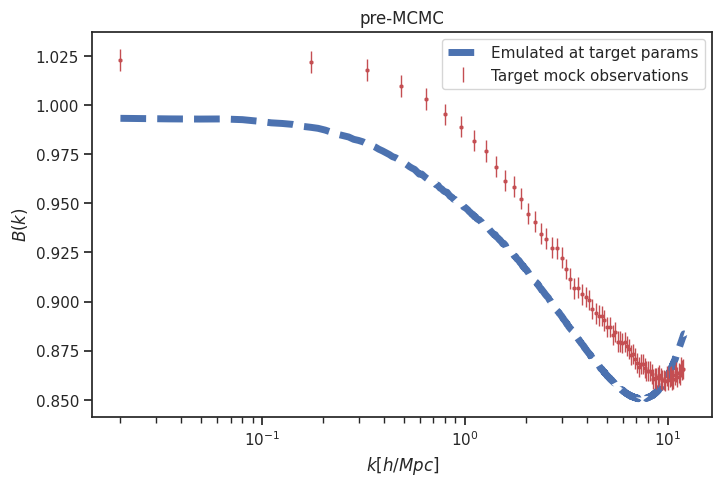

In [ ]:
f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(params_calib, redshift)
bk_target, err_target = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)
a.plot(k_all, bk_target[:, 0], label='Emulated at target params', lw=5, ls='--')
a.errorbar(x, y, yerr, label='Target mock observations', ls='none', lw=1, color = "r")
a.scatter(x, y, s = 5, marker = "h", color = "r")
a.set_xscale('log')
plt.title('pre-MCMC')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$B(k)$')
plt.legend()

In [ ]:
allMax = np.max(p_all, axis = 0)
allMin = np.min(p_all, axis = 0)

param1 = [PARAM_NAME[0], params_calib[0][0], allMin[0], allMax[0]] 
param2 = [PARAM_NAME[1], params_calib[0][1], allMin[1], allMax[1]]
param3 = [PARAM_NAME[2], params_calib[0][2], allMin[2], allMax[2]]
param4 = [PARAM_NAME[3], params_calib[0][3], allMin[3], allMax[2]]
param5 = [PARAM_NAME[4], params_calib[0][4], allMin[4], allMax[4]]

params_list = [param1, param2, param3, param4, param5]

In [ ]:
pos0 = chain_init(params_list, ndim, nwalkers)
sampler = define_sampler(redshift, ndim, nwalkers, params_list, x_grid, sepia_model_list, z_all, x, y, yerr)

In [ ]:
np.append(np.array(pos0[0]), [1.000])

array([0.13828145, 1.08663491, 0.81760626, 0.88101574, 0.47104757,
       1.        ])

In [ ]:
p1 = 0.2
p2 = 0.3
p3 = 0.4
p4 = 0.3
p5 = 0.2
redshift = 0.3

theta = [p1, p2, p3, p4, p5]

new_params = np.array(theta + [redshift])[np.newaxis, :]
print(new_params)

model_grid, model_var_grid = emu_redshift(new_params, sepia_model_list, z_all)
print(model_grid.max(), model_var_grid.max())

new_params = np.array([p1, p2, p3, p4, p5, redshift])[np.newaxis, :]
print(new_params)

model_grid, model_var_grid = emu_redshift(new_params, sepia_model_list, z_all)
print(model_grid.max(), model_var_grid.max())



[[0.2 0.3 0.4 0.3 0.2 0.3]]
1.0085819247347572 1.0086969674676909
[[0.2 0.3 0.4 0.3 0.2 0.3]]
1.0085272674443067 1.0086382559036546


In [ ]:

# model_grid, model_var_grid = emu_redshift(new_params, sepia_model_list, z_all)
# print(model_grid.max(), model_var_grid.max())

In [ ]:
print(ln_like(theta, redshift, x_grid, sepia_model_list, z_all, x, y, yerr))
print(ln_like(theta, redshift, x_grid, sepia_model_list, z_all, x, y, yerr))
print(ln_like(theta, redshift, x_grid, sepia_model_list, z_all, x, y, yerr))

-0.007277789732769892
-0.005978218042074299
-0.005678975186025005


In [ ]:
do_mcmc(sampler, pos0, 10, ndim, if_burn=True)

ValueError: negative dimensions are not allowed

In [ ]:
pos, prob, state, samples, sampler = do_mcmc(sampler, pos0, nrun_burn, ndim, if_burn=True)
pos, prob, state, samples, sampler = do_mcmc(sampler, pos, nrun, ndim, if_burn=False)
p_mcmc = mcmc_results(samples)

emcee: Exception while calling your likelihood function:
  params: [0.12270278 1.09487954 0.82975626 0.88508475 0.48131031]
  args: (0.01, [['$\\Omega_m h^2$', 0.139, 0.12, 0.15], ['$n_s$', 1.085, 0.85, 1.1], ['$\\sigma_8$', 0.8184, 0.7, 0.9], ['$E_{ds}$', 0.881360068134854, 0.8292872507980129, 0.9], ['$f_\\phi$', 0.4694, 0.02041, 1.0]], array([ 0.020046,  0.035041,  0.049231,  0.063783,  0.080073,  0.096163,
        0.111083,  0.126058,  0.142273,  0.158546,  0.17375 ,  0.188953,
        0.204907,  0.220756,  0.23588 ,  0.2514  ,  0.267535,  0.283568,
        0.299022,  0.314451,  0.330372,  0.346141,  0.361624,  0.377134,
        0.392932,  0.408854,  0.424564,  0.440253,  0.455999,  0.471626,
        0.48727 ,  0.502856,  0.518488,  0.534347,  0.550082,  0.565732,
        0.581496,  0.597222,  0.612804,  0.628434,  0.644267,  0.660051,
        0.675724,  0.691403,  0.707174,  0.722871,  0.73838 ,  0.754018,
        0.769845,  0.78569 ,  0.801365,  0.817031,  0.832809,  0.848511,
   

Traceback (most recent call last):
  File "/home/nramachandra/anaconda3/envs/qom_torch_tf/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/nramachandra/Projects/MG_emu/Codes/CubicGalileonEmu/CubicGalileonEmu/mcmc.py", line 68, in ln_prob
    return lp + ln_like(theta, redshift, x_grid, sepia_model_list, z_all, x, y, yerr)
  File "/home/nramachandra/Projects/MG_emu/Codes/CubicGalileonEmu/CubicGalileonEmu/mcmc.py", line 42, in ln_like
    model_grid, model_var_grid = emu_redshift(new_params, sepia_model_list, z_all)
  File "/home/nramachandra/Projects/MG_emu/Codes/CubicGalileonEmu/CubicGalileonEmu/emu.py", line 98, in emu_redshift
    Bk_z2, Bk_z2_err = emulate(sepia_model_z2, input_params)
  File "/home/nramachandra/Projects/MG_emu/Codes/CubicGalileonEmu/CubicGalileonEmu/emu.py", line 31, in emulate
    pred = SepiaEmulatorPrediction(t_pred=ip, samples=pred_samples, model=sepia_model)
  File "/home/nramac

KeyboardInterrupt: 

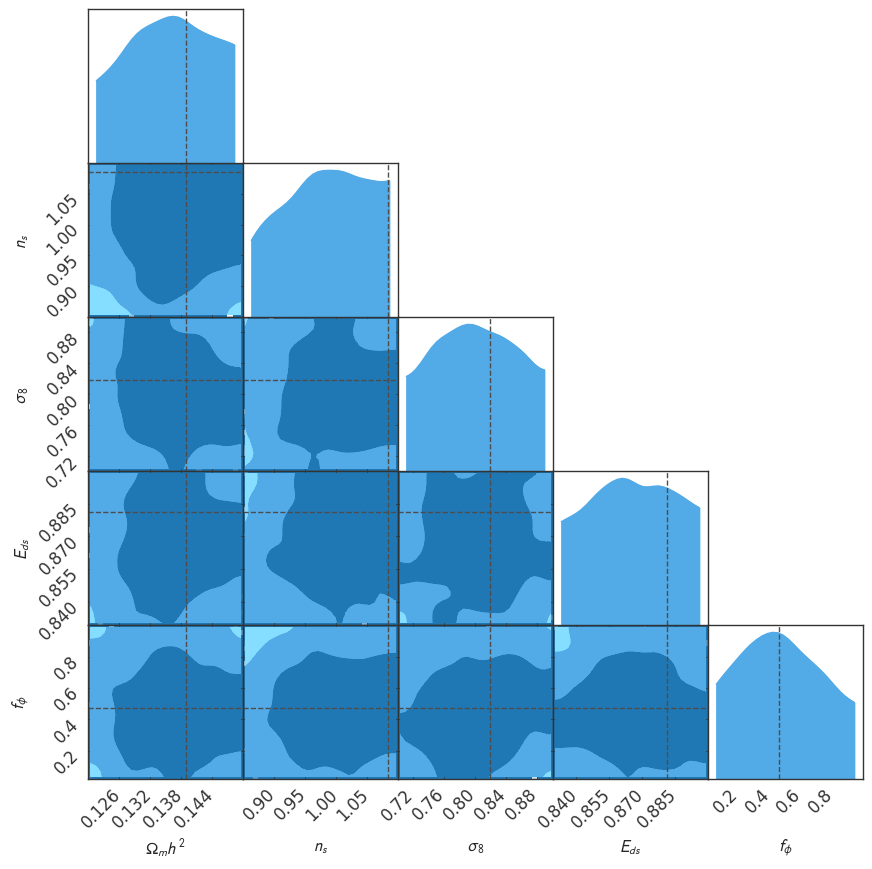

In [ ]:
fig = plot_mcmc(samples, params_list, if_truth_know=True)

<matplotlib.legend.Legend>

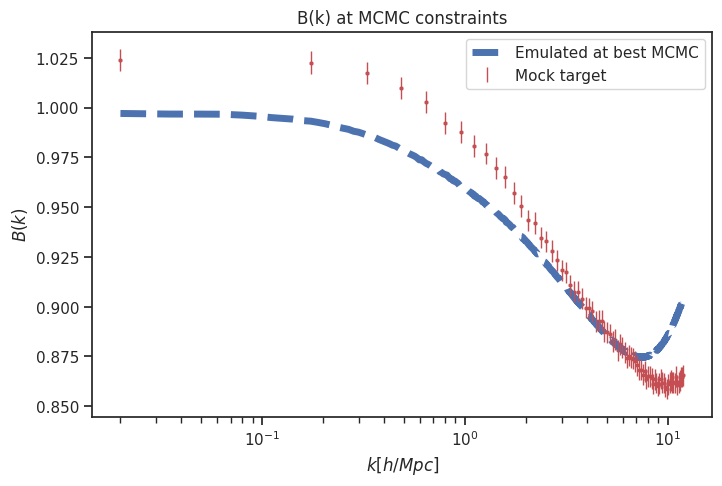

In [ ]:
f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(p_mcmc, redshift)
bk_mcmc, err_mcmc = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)
a.plot(k_all, bk_mcmc[:, 0], label='Emulated at best MCMC', lw=5, ls='--')
a.errorbar(x, y, yerr, label='Mock target', ls='none', lw=1, color = "r")
a.scatter(x, y, s = 5, marker = "h", color = "r")
a.set_xscale('log')
plt.title('B(k) at MCMC constraints')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$B(k)$')
plt.legend()
